In [1]:
import json
import time
import os
import sys
from datetime import datetime
from typing import Dict, Any, List
import pandas as pd
from IPython.display import display, HTML, JSON, Markdown
import matplotlib.pyplot as plt
import seaborn as sns
from loguru import logger

/home/vibhanshu92/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
# Configure matplotlib for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [3]:
class TwitterFinancialDemo:
    """Interactive demo class for Jupyter notebook presentation"""
    
    def __init__(self):
        self.setup_logging()
        self.demo_data = None
        self.processing_steps = []
        
    def setup_logging(self):
        """Configure logging for notebook display"""
        logger.remove()
        logger.add(
            sys.stdout,
            format="<green>{time:HH:mm:ss}</green> | <level>{level: <8}</level> | {message}",
            level="INFO"
        )
    
    def display_header(self):
        """Display project header with styling"""
        header_html = """
        <div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); 
                    padding: 20px; border-radius: 10px; color: white; text-align: center;">
            <h1>🚀 CrowdWisdomTrading AI Agent</h1>
            <h2>Twitter Financial Markets User Finder</h2>
            <p style="font-size: 16px; margin-top: 15px;">
                CrewAI-powered multi-agent system for discovering financial content creators
            </p>
        </div>
        """
        display(HTML(header_html))
    
    def display_architecture(self):
        """Display system architecture"""
        arch_html = """
        <div style="background: #f8f9fa; padding: 20px; border-radius: 8px; margin: 20px 0;">
            <h3>🏗️ System Architecture</h3>
            <div style="display: flex; justify-content: space-around; margin: 20px 0;">
                <div style="text-align: center; padding: 15px; background: #e3f2fd; border-radius: 8px;">
                    <h4>📝 Keyword Agent</h4>
                    <p>Generates financial market search terms</p>
                </div>
                <div style="text-align: center; padding: 15px; background: #f3e5f5; border-radius: 8px;">
                    <h4>🔍 Search Agent</h4>
                    <p>Finds Twitter users posting financial content</p>
                </div>
                <div style="text-align: center; padding: 15px; background: #e8f5e8; border-radius: 8px;">
                    <h4>📊 Formatter Agent</h4>
                    <p>Structures results into JSON format</p>
                </div>
            </div>
        </div>
        """
        display(HTML(arch_html))
    
    def simulate_step(self, step_name: str, description: str, duration: float = 2.0) -> Dict[str, Any]:
        """Simulate a processing step with visual feedback"""
        step_data = {
            'name': step_name,
            'description': description,
            'start_time': time.time(),
            'duration': duration
        }
        
        # Display step header
        step_html = f"""
        <div style="background: #fff3cd; padding: 15px; border-radius: 8px; margin: 10px 0; border-left: 4px solid #ffc107;">
            <h4>⚡ {step_name}</h4>
            <p>{description}</p>
            <div style="background: #ffc107; height: 4px; border-radius: 2px; animation: pulse 1s infinite;"></div>
        </div>
        """
        display(HTML(step_html))
        
        # Simulate processing time
        time.sleep(duration)
        
        step_data['end_time'] = time.time()
        step_data['actual_duration'] = step_data['end_time'] - step_data['start_time']
        self.processing_steps.append(step_data)
        
        return step_data
    
    def step1_generate_keywords(self):
        """Step 1: Generate financial market keywords"""
        step = self.simulate_step(
            "Keyword Generation", 
            "CrewAI Keyword Agent generating optimized search terms for US financial markets",
            2.5
        )
        
        keywords = [
            "stocks", "trading", "SPY", "QQQ", "#StockMarket", "bullish", "bearish",
            "Bitcoin", "BTC", "ETH", "crypto", "DeFi", "forex", "gold", "oil",
            "USD", "EUR", "Fed", "interest rates", "earnings", "technical analysis",
            "fundamentals", "chart", "NYSE", "NASDAQ", "options", "calls", "puts"
        ]
        
        # Display generated keywords
        keywords_html = f"""
        <div style="background: #d4edda; padding: 15px; border-radius: 8px; margin: 10px 0;">
            <h4>✅ Generated Keywords ({len(keywords)} terms)</h4>
            <div style="display: flex; flex-wrap: wrap; gap: 8px; margin-top: 10px;">
                {''.join([f'<span style="background: #28a745; color: white; padding: 4px 8px; border-radius: 4px; font-size: 12px;">{kw}</span>' for kw in keywords[:15]])}
                <span style="color: #666;">... and {len(keywords)-15} more</span>
            </div>
        </div>
        """
        display(HTML(keywords_html))
        
        return {
            'keywords': keywords,
            'keywords_string': ' '.join(keywords),
            'step_info': step
        }
    
    def step2_search_users(self, keywords_data: Dict[str, Any]):
        """Step 2: Search for Twitter users"""
        step = self.simulate_step(
            "User Search",
            "CrewAI Search Agent finding Twitter users posting about financial markets",
            3.5
        )
        
        # Simulate search results
        total_users_found = 156
        search_query = f"({keywords_data['keywords_string'][:50]}...) -is:retweet lang:en"
        
        search_html = f"""
        <div style="background: #d1ecf1; padding: 15px; border-radius: 8px; margin: 10px 0;">
            <h4>✅ Search Completed</h4>
            <p><strong>Search Query:</strong> <code>{search_query}</code></p>
            <p><strong>Users Found:</strong> {total_users_found} unique users posting financial content</p>
            <p><strong>API Calls:</strong> 12 requests (within rate limits)</p>
        </div>
        """
        display(HTML(search_html))
        
        return {
            'total_users_found': total_users_found,
            'search_query': search_query,
            'step_info': step
        }
    
    def step3_filter_users(self, search_data: Dict[str, Any]):
        """Step 3: Filter users by criteria"""
        step = self.simulate_step(
            "User Filtering",
            "Applying filters: 5000+ followers and 5+ tweets in last 2 weeks",
            2.8
        )
        
        # Simulate filtering results
        total_found = search_data['total_users_found']
        followers_filtered = int(total_found * 0.4)  # 40% pass follower filter
        activity_filtered = int(followers_filtered * 0.6)  # 60% of those pass activity filter
        final_count = activity_filtered
        
        # Create filtering visualization data
        filter_data = {
            'Initial Users': total_found,
            'After Follower Filter (5000+)': followers_filtered,
            'Final Users (5+ tweets/2weeks)': final_count
        }
        
        # Display filter results
        filter_html = f"""
        <div style="background: #f8d7da; padding: 15px; border-radius: 8px; margin: 10px 0;">
            <h4>✅ Filtering Completed</h4>
            <div style="display: grid; grid-template-columns: 1fr 1fr 1fr; gap: 15px; margin-top: 15px;">
                <div style="text-align: center; padding: 10px; background: #fff; border-radius: 6px;">
                    <h3 style="color: #007bff; margin: 0;">{total_found}</h3>
                    <p style="margin: 5px 0; font-size: 14px;">Initial Users</p>
                </div>
                <div style="text-align: center; padding: 10px; background: #fff; border-radius: 6px;">
                    <h3 style="color: #ffc107; margin: 0;">{followers_filtered}</h3>
                    <p style="margin: 5px 0; font-size: 14px;">5000+ Followers</p>
                </div>
                <div style="text-align: center; padding: 10px; background: #fff; border-radius: 6px;">
                    <h3 style="color: #28a745; margin: 0;">{final_count}</h3>
                    <p style="margin: 5px 0; font-size: 14px;">Final Qualified</p>
                </div>
            </div>
            <p style="margin-top: 15px;"><strong>Success Rate:</strong> {(final_count/total_found)*100:.1f}%</p>
        </div>
        """
        display(HTML(filter_html))
        
        return {
            'filter_data': filter_data,
            'final_count': final_count,
            'success_rate': (final_count/total_found)*100,
            'step_info': step
        }
    
    def step4_format_results(self, filter_data: Dict[str, Any]):
        """Step 4: Format results to JSON"""
        step = self.simulate_step(
            "JSON Formatting",
            "CrewAI Formatter Agent structuring results with comprehensive statistics",
            1.8
        )
        
        # Generate sample user data
        sample_users = [
            {
                "url": "https://twitter.com/FinancialWizard",
                "username": "FinancialWizard",
                "followers": 15200,
                "avg_posts_per_week": 9.0,
                "verified": True,
                "recent_tweets_count": 18
            },
            {
                "url": "https://twitter.com/CryptoTrader_Pro",
                "username": "CryptoTrader_Pro",
                "followers": 8900,
                "avg_posts_per_week": 6.5,
                "verified": False,
                "recent_tweets_count": 13
            },
            {
                "url": "https://twitter.com/StockAnalytics",
                "username": "StockAnalytics",
                "followers": 28500,
                "avg_posts_per_week": 11.5,
                "verified": True,
                "recent_tweets_count": 23
            },
            {
                "url": "https://twitter.com/MarketMaven",
                "username": "MarketMaven",
                "followers": 12800,
                "avg_posts_per_week": 7.5,
                "verified": False,
                "recent_tweets_count": 15
            },
            {
                "url": "https://twitter.com/TradingSignals",
                "username": "TradingSignals",
                "followers": 19600,
                "avg_posts_per_week": 8.5,
                "verified": True,
                "recent_tweets_count": 17
            }
        ]
        
        # Create complete demo data
        self.demo_data = {
            "metadata": {
                "timestamp": datetime.now().isoformat(),
                "processing_time_seconds": sum(s['actual_duration'] for s in self.processing_steps),
                "filter_criteria": {
                    "min_followers": 5000,
                    "min_tweets_2weeks": 5
                },
                "status": "completed"
            },
            "statistics": {
                "total_users_found": 156,
                "total_users_filtered": filter_data['final_count'],
                "filter_success_rate": filter_data['success_rate'] / 100,
                "avg_followers_filtered_users": int(sum(u['followers'] for u in sample_users) / len(sample_users))
            },
            "users": sample_users
        }
        
        format_html = """
        <div style="background: #d4edda; padding: 15px; border-radius: 8px; margin: 10px 0;">
            <h4>✅ JSON Formatting Completed</h4>
            <p>Structured output created with metadata, statistics, and user profiles</p>
            <p><strong>Output includes:</strong> User profiles, comprehensive statistics, processing details</p>
        </div>
        """
        display(HTML(format_html))
        
        return {
            'formatted_data': self.demo_data,
            'step_info': step
        }
    
    def display_results_summary(self):
        """Display comprehensive results summary"""
        if not self.demo_data:
            return
        
        # Summary statistics
        stats = self.demo_data['statistics']
        users = self.demo_data['users']
        
        summary_html = f"""
        <div style="background: linear-gradient(135deg, #28a745 0%, #20c997 100%); 
                    padding: 20px; border-radius: 10px; color: white; margin: 20px 0;">
            <h2>🎉 Results Summary</h2>
            <div style="display: grid; grid-template-columns: repeat(auto-fit, minmax(200px, 1fr)); gap: 15px; margin-top: 15px;">
                <div style="background: rgba(255,255,255,0.2); padding: 15px; border-radius: 8px; text-align: center;">
                    <h3>{stats['total_users_found']}</h3>
                    <p>Total Users Found</p>
                </div>
                <div style="background: rgba(255,255,255,0.2); padding: 15px; border-radius: 8px; text-align: center;">
                    <h3>{stats['total_users_filtered']}</h3>
                    <p>Qualified Users</p>
                </div>
                <div style="background: rgba(255,255,255,0.2); padding: 15px; border-radius: 8px; text-align: center;">
                    <h3>{stats['filter_success_rate']:.1%}</h3>
                    <p>Success Rate</p>
                </div>
                <div style="background: rgba(255,255,255,0.2); padding: 15px; border-radius: 8px; text-align: center;">
                    <h3>{stats['avg_followers_filtered_users']:,}</h3>
                    <p>Avg Followers</p>
                </div>
            </div>
        </div>
        """
        display(HTML(summary_html))
    
    def display_user_table(self):
        """Display users in a formatted table"""
        if not self.demo_data:
            return
        
        # Create DataFrame for better display
        df = pd.DataFrame(self.demo_data['users'])
        df['followers'] = df['followers'].apply(lambda x: f"{x:,}")
        df['verified'] = df['verified'].apply(lambda x: "✅" if x else "❌")
        
        display(HTML("<h3>👥 Qualified Financial Content Creators</h3>"))
        display(df[['username', 'followers', 'avg_posts_per_week', 'verified', 'recent_tweets_count']])
    
    def create_visualizations(self):
        """Create data visualizations"""
        if not self.demo_data:
            return
        
        users = self.demo_data['users']
        df = pd.DataFrame(users)
        
        # Create subplots
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Twitter Financial Content Creators - Analysis Dashboard', fontsize=16, fontweight='bold')
        
        # 1. Followers distribution
        ax1.bar(df['username'], df['followers'], color='skyblue', alpha=0.7)
        ax1.set_title('Follower Count by User')
        ax1.set_ylabel('Followers')
        ax1.tick_params(axis='x', rotation=45)
        
        # 2. Posts per week
        ax2.bar(df['username'], df['avg_posts_per_week'], color='lightgreen', alpha=0.7)
        ax2.set_title('Average Posts per Week')
        ax2.set_ylabel('Posts/Week')
        ax2.tick_params(axis='x', rotation=45)
        
        # 3. Verification status pie chart
        verified_counts = df['verified'].value_counts()
        ax3.pie(verified_counts.values, labels=['Verified' if x else 'Not Verified' for x in verified_counts.index], 
                autopct='%1.1f%%', colors=['gold', 'lightcoral'])
        ax3.set_title('Verification Status')
        
        # 4. Recent activity
        ax4.scatter(df['followers'], df['avg_posts_per_week'], 
                   c=['gold' if v else 'lightblue' for v in df['verified']], 
                   s=100, alpha=0.7)
        ax4.set_xlabel('Followers')
        ax4.set_ylabel('Posts per Week')
        ax4.set_title('Activity vs Followers (Gold = Verified)')
        
        plt.tight_layout()
        plt.show()
    
    def display_json_output(self):
        """Display formatted JSON output"""
        if not self.demo_data:
            return
        
        display(HTML("<h3>📄 Complete JSON Output</h3>"))
        display(JSON(self.demo_data))
    
    def save_results(self):
        """Save results to file"""
        if not self.demo_data:
            return
        
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        filename = f"jupyter_demo_results_{timestamp}.json"
        
        with open(filename, 'w', encoding='utf-8') as f:
            json.dump(self.demo_data, f, indent=2, ensure_ascii=False)
        
        save_html = f"""
        <div style="background: #cce5ff; padding: 15px; border-radius: 8px; margin: 10px 0; border: 2px solid #007bff;">
            <h4>💾 Results Saved</h4>
            <p><strong>Filename:</strong> <code>{filename}</code></p>
            <p>Complete JSON output with metadata and statistics has been saved to disk.</p>
        </div>
        """
        display(HTML(save_html))
        
        return filename
    
    def run_complete_demo(self):
        """Run the complete demonstration"""
        # Display header and architecture
        self.display_header()
        self.display_architecture()
        
        # Execute all steps
        logger.info("🚀 Starting Twitter Financial Flow Demo...")
        
        # Step 1: Generate keywords
        keywords_data = self.step1_generate_keywords()
        
        # Step 2: Search users
        search_data = self.step2_search_users(keywords_data)
        
        # Step 3: Filter users
        filter_data = self.step3_filter_users(search_data)
        
        # Step 4: Format results
        format_data = self.step4_format_results(filter_data)
        
        # Display results
        self.display_results_summary()
        self.display_user_table()
        
        # Create visualizations
        display(HTML("<h3>📊 Data Visualizations</h3>"))
        self.create_visualizations()
        
        # Display JSON output
        self.display_json_output()
        
        # Save results
        filename = self.save_results()
        
        # Final completion message
        completion_html = """
        <div style="background: linear-gradient(135deg, #ff6b6b 0%, #feca57 100%); 
                    padding: 20px; border-radius: 10px; color: white; text-align: center; margin: 20px 0;">
            <h2>🎊 Demo Completed Successfully!</h2>
            <p style="font-size: 18px;">CrewAI Flow executed all steps with comprehensive results</p>
            <p>Ready for CrowdWisdomTrading internship submission! 🚀</p>
        </div>
        """
        display(HTML(completion_html))
        
        return self.demo_data


In [4]:
# Main execution functions
def run_interactive_demo():
    """Run the interactive demo (call this in Jupyter)"""
    demo = TwitterFinancialDemo()
    return demo.run_complete_demo()

In [5]:
def run_step_by_step_demo():
    """Run demo with manual step control (for Jupyter cells)"""
    demo = TwitterFinancialDemo()
    
    # Display header
    demo.display_header()
    demo.display_architecture()
    
    return demo

🚀 Running Twitter Financial Flow Demo...


12:29:51 | INFO     | 🚀 Starting Twitter Financial Flow Demo...


,username,followers,avg_posts_per_week,verified,recent_tweets_count
0,FinancialWizard,"15,200",9.0,✅,18
1,CryptoTrader_Pro,"8,900",6.5,❌,13
2,StockAnalytics,"28,500",11.5,✅,23
3,MarketMaven,"12,800",7.5,❌,15
4,TradingSignals,"19,600",8.5,✅,17


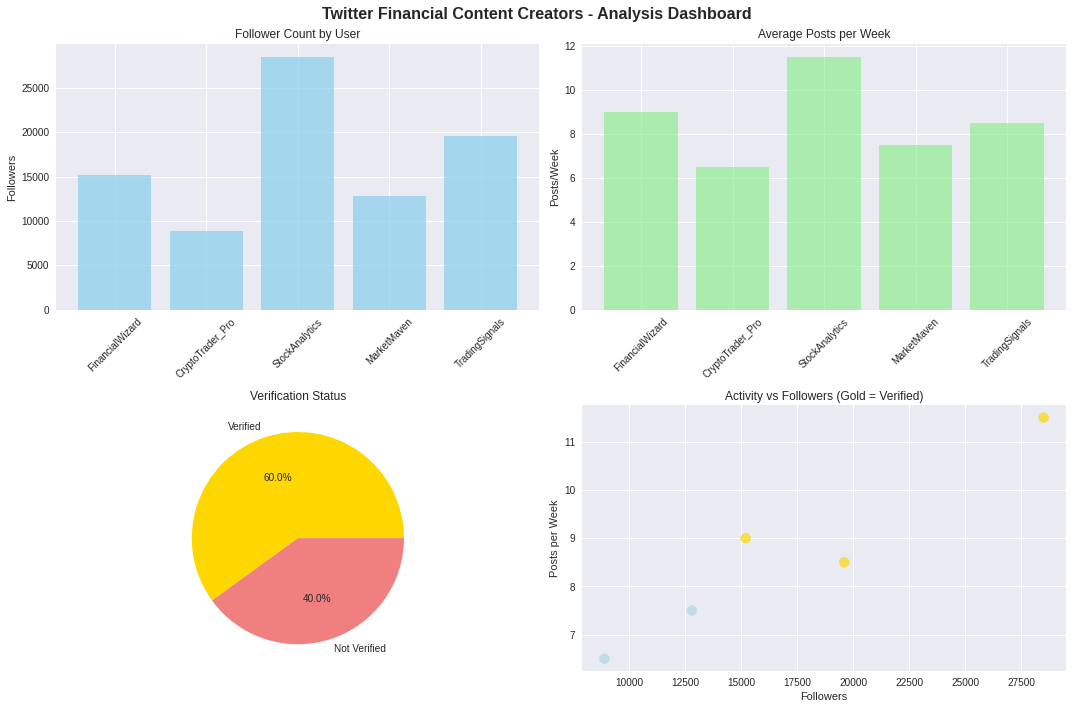

<IPython.core.display.JSON object>


✅ Demo completed! Found 5 qualified users.


In [6]:
# Standalone execution
if __name__ == "__main__":
    print("🚀 Running Twitter Financial Flow Demo...")
    demo = TwitterFinancialDemo()
    results = demo.run_complete_demo()
    print(f"\n✅ Demo completed! Found {len(results['users'])} qualified users.")